# IMPORTING RELEVANT LIBRARIES

In [2]:
#Importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score


import tensorflow
import warnings
warnings.filterwarnings('ignore')

I will be reading uszips.csv to use for furthur analysis of zipcodes 

In [4]:
#Reading the tsv
d1 = pd.read_csv('chunk1.csv', encoding= 'unicode_escape', sep=',')

In [5]:
#reading the zip files
d2 = pd.read_csv('uszips.csv')

In [6]:
d2.columns

Index(['zip', 'lat', 'lng', 'city', 'state_id', 'state_name', 'zcta',
       'parent_zcta', 'population', 'density', 'county_fips', 'county_name',
       'all_county_weights', 'imprecise', 'military', 'timezone'],
      dtype='object')

For the EDA on data I will be focus on 'zip', 'lat', 'lng', 'city', 'state_id', 'state_name' columns of uszips.csv

In [7]:
d2  = d2[['zip', 'lat', 'lng', 'city', 'state_id', 'state_name']]

In [8]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66199 entries, 0 to 66198
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   zip         66199 non-null  object
 1   lat         66199 non-null  object
 2   lng         66199 non-null  object
 3   city        66199 non-null  object
 4   state_id    66199 non-null  object
 5   state_name  66199 non-null  object
dtypes: object(6)
memory usage: 3.0+ MB


In [9]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 50000 non-null  int64  
 1   b2c_c2c                    50000 non-null  object 
 2   seller_id                  50000 non-null  int64  
 3   declared_handling_days     47494 non-null  float64
 4   acceptance_scan_timestamp  50000 non-null  object 
 5   shipment_method_id         50000 non-null  int64  
 6   shipping_fee               50000 non-null  float64
 7   carrier_min_estimate       50000 non-null  int64  
 8   carrier_max_estimate       50000 non-null  int64  
 9   item_zip                   50000 non-null  object 
 10  buyer_zip                  50000 non-null  object 
 11  category_id                50000 non-null  int64  
 12  item_price                 50000 non-null  float64
 13  quantity                   50000 non-null  int

In [11]:
d1 = d1.iloc[: ,1:]

In [12]:
d1.head()

,b2c_c2c,seller_id,declared_handling_days,acceptance_scan_timestamp,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,item_zip,buyer_zip,category_id,item_price,quantity,payment_datetime,delivery_date,weight,weight_units,package_size,record_number
0,B2C,25454,3.0,2019-03-26 15:11:00.000-07:00,0,0.0,3,5,97219,49040,13,27.95,1,2019-03-24 03:56:49.000-07:00,2019-03-29,5,1,LETTER,1
1,C2C,6727381,2.0,2018-06-02 12:53:00.000-07:00,0,3.0,3,5,11415-3528,62521,0,20.50,1,2018-06-01 13:43:54.000-07:00,2018-06-05,0,1,PACKAGE_THICK_ENVELOPE,2
2,B2C,18507,1.0,2019-01-07 16:22:00.000-05:00,0,4.5,3,5,27292,53010,1,19.90,1,2019-01-06 00:02:00.000-05:00,2019-01-10,9,1,PACKAGE_THICK_ENVELOPE,3
3,B2C,4677,1.0,2018-12-17 16:56:00.000-08:00,0,0.0,3,5,90703,80022,1,35.50,1,2018-12-16 10:28:28.000-08:00,2018-12-21,8,1,PACKAGE_THICK_ENVELOPE,4
4,B2C,4677,1.0,2018-07-27 16:48:00.000-07:00,0,0.0,3,5,90703,55070,1,25.00,1,2018-07-26 18:20:02.000-07:00,2018-07-30,3,1,PACKAGE_THICK_ENVELOPE,5


On preliminary analysis in Excel , I noted that zip had several formats that, including 5 digit, 5+4 digit, and 9 digit (same meaning as 5+4 digit but without the dash in between).
I will be cleaning item_zip and buyer_zip columns and keeping only the first 5 digits of zipcodes.

In [14]:
#converting item_zip from object to a number
items = []
for item in d1['item_zip']:
    #checking if the item is a string
    if isinstance(item, str):
        #remove comma if any
        item = item.replace(",", "")
        #parsing length to 5
        item = item[:5]
        #spliting on delimeter if any
        item = item.split("-")[0]
    #converting into int
    try:
        item = int(item)
    except:
        item = 0
    items.append(item)


d1['item_zip'] = items

In [15]:
#converting item_zip from object to a number
items = []
for item in d1['buyer_zip']:
    #checking if the item is a string
    if isinstance(item, str):
        #remove comma if any
        item = item.replace(",", "")
        #parsing length to 5
        item = item[:5]
        #spliting on delimeter if any
        item = item.split("-")[0]
    #converting into int
    try:
        item = int(item)
    except:
        item = 0
    items.append(item)


d1['buyer_zip'] = items

Since the dataset has date that might have unnecessary space, I will parsing to all columns with datetime format to remove those spaces

In [16]:
#parsing the payment_datetime
items = []
for item in d1['payment_datetime']:
    #removing unnecessary string after space
    item = item.split(" ")[0]
    items.append(item)

d1['payment_datetime'] = items

In [17]:
#parsing the acceptance_scan_timestamp
items = []
for item in d1['acceptance_scan_timestamp']:
    #removing unnecessary string after space
    item = item.split(" ")[0]
    items.append(item)

d1['acceptance_scan_timestamp'] = items

In [18]:
#parsing the payment_datetime
items = []
for item in d1['delivery_date']:
    #removing unnecessary string after space
    item = item.split(" ")[0]
    items.append(item)

d1['delivery_date'] = items

Merging dataset. <br>It will be a two step procedure

1. Merge w.r.t item_zip to get the longitudes and latitudes of the store
2. Merge w.r.t. buyer_zip to get the longitudes and latitudes of the buyer

I will be performing inner join so that all the records (zips) that are not consistent in both the dataframes are dropprd

In [19]:
merge_1 = pd.merge(d2, d1, left_on = "zip", right_on = "item_zip", how = 'inner')

In [20]:
#renaming the columns 
merge_1.rename(columns={'lng': 'item_lng', 'lat': 'item_lat'}, inplace=True)

In [21]:
merge_2 = pd.merge(d2, merge_1, left_on = "zip", right_on = "buyer_zip", how = 'inner')

In [22]:
merge_2.rename(columns={'lng': 'buyer_lng', 'lat': 'buyer_lat'}, inplace=True)

In [23]:
df = merge_2

In [24]:
df.head()

,zip_x,buyer_lat,buyer_lng,city_x,state_id_x,state_name_x,zip_y,item_lat,item_lng,city_y,...,buyer_zip,category_id,item_price,quantity,payment_datetime,delivery_date,weight,weight_units,package_size,record_number
0,1001,42.06258,-72.6259,Agawam,MA,Massachusetts,6255,41.98828,-71.90256,North Grosvenordale,...,1001,25,94.00,1,2018-03-06,2018-03-10,0,1,PACKAGE_THICK_ENVELOPE,4092
1,1001,42.06258,-72.6259,Agawam,MA,Massachusetts,19114,40.06736,-75.00358,Philadelphia,...,1001,0,8.00,1,2018-11-17,2018-11-23,0,1,PACKAGE_THICK_ENVELOPE,301
2,1001,42.06258,-72.6259,Agawam,MA,Massachusetts,33126,25.77984,-80.29887,Miami,...,1001,2,59.99,1,2019-09-20,2019-09-25,0,1,NONE,11395
3,1001,42.06258,-72.6259,Agawam,MA,Massachusetts,64068,39.25949,-94.38879,Liberty,...,1001,0,14.98,1,2018-02-21,2018-02-24,0,1,LETTER,37987
4,1001,42.06258,-72.6259,Agawam,MA,Massachusetts,84062,40.43484,-111.67779,Pleasant Grove,...,1001,10,5.99,1,2019-10-30,2019-11-02,0,1,PACKAGE_THICK_ENVELOPE,30976


Lets check for missing values in our dataset.

In [27]:
na_val = pd.DataFrame(df.isna().sum())
top_na = na_val.sort_values(by = 0 , ascending = False)[:3]
top_na[0] = (top_na[0])
top_na.rename(columns = {0:' Number of missing values in Train'})

,Number of missing values in Train
declared_handling_days,2480
zip_x,0
shipment_method_id,0


In [28]:
df.head()

,zip_x,buyer_lat,buyer_lng,city_x,state_id_x,state_name_x,zip_y,item_lat,item_lng,city_y,...,buyer_zip,category_id,item_price,quantity,payment_datetime,delivery_date,weight,weight_units,package_size,record_number
0,1001,42.06258,-72.6259,Agawam,MA,Massachusetts,6255,41.98828,-71.90256,North Grosvenordale,...,1001,25,94.00,1,2018-03-06,2018-03-10,0,1,PACKAGE_THICK_ENVELOPE,4092
1,1001,42.06258,-72.6259,Agawam,MA,Massachusetts,19114,40.06736,-75.00358,Philadelphia,...,1001,0,8.00,1,2018-11-17,2018-11-23,0,1,PACKAGE_THICK_ENVELOPE,301
2,1001,42.06258,-72.6259,Agawam,MA,Massachusetts,33126,25.77984,-80.29887,Miami,...,1001,2,59.99,1,2019-09-20,2019-09-25,0,1,NONE,11395
3,1001,42.06258,-72.6259,Agawam,MA,Massachusetts,64068,39.25949,-94.38879,Liberty,...,1001,0,14.98,1,2018-02-21,2018-02-24,0,1,LETTER,37987
4,1001,42.06258,-72.6259,Agawam,MA,Massachusetts,84062,40.43484,-111.67779,Pleasant Grove,...,1001,10,5.99,1,2019-10-30,2019-11-02,0,1,PACKAGE_THICK_ENVELOPE,30976


Since we have ample records, we can drop missing values instead of using ffill, bfill, etc.

In [25]:
df.dropna(inplace = True)

In [46]:
df['buyer_lng'] = df['buyer_lng'].astype(float)
df['item_lng'] = df['item_lng'].astype(float)
df['buyer_lat'] = df['buyer_lat'].astype(float)
df['item_lat'] = df['item_lat'].astype(float)


Through the zipcodes it is possible to find the various information about buyer and seller. 
First, I will be finding the distance between the item and the buyer on the basis of longitudes and latitudes by extracting it from the zipcode 


In [47]:

#converting the cordinates into radians
buyer_lng=np.radians(df['buyer_lng'])
item_lng=np.radians(df['item_lng'])
buyer_lat=np.radians(df['buyer_lat'])
item_lat=np.radians(df['item_lat'])

dlon = buyer_lng - item_lng
dlat = buyer_lat - item_lat

# using haversine formula
a = np.sin(dlat/2)**2 + np.cos(buyer_lat) * np.cos(item_lat) * np.sin(dlon/2)**2

c = 2 * np.arcsin(np.sqrt(a)) 

# Radius of earth in kilometers is 6371
km = 6371* c

df['distance'] = km

Delivery days can be calcualted by subtracting the delivery_date and payment_date. 
This can be done by using to_datetime() function.
.to_datetime() is used to chage the format of the columns to date
delivery days = delivery date - payment date


In [48]:
df['delivery_days']  = ((pd.to_datetime(df['delivery_date']) - pd.to_datetime(df['payment_datetime'])).astype('timedelta64[D]')).astype(int)

I will aslo find the delay in payment acceptance to get more insights on delay in payment time.
The delay in acceptance can be caluclated by 
delay in acceptance = acceptance time - payment time

In [49]:
df['del_to_pay'] = ((pd.to_datetime(df['acceptance_scan_timestamp']) - pd.to_datetime(df['payment_datetime'])).astype('timedelta64[D]')).astype(int)

I am assuming that the delivery days should be more than or equal to zero.
I am assuming that all payments were made through online or card before placing the order. 
If delivery day is less than zero , I am assuming that it was either error or the payment was accepted after the delivery was done.
It could also mean that it was cash on/after delivery.
If such records are encountered, i will be dropping them as well.

In [61]:
df = df[df['delivery_days'] >= 0]

Lets reorgranize the dataset by keeping only necessary columns.

In [62]:
#sorting the columns by record number
df = df.sort_values(by=['record_number'])

In [33]:
#dropping unnecessary columns
df = df[['b2c_c2c', 'declared_handling_days', 'shipment_method_id', 'shipping_fee',
       'carrier_min_estimate', 'carrier_max_estimate',
       'category_id', 'item_price', 'quantity',
       'weight', 'weight_units', 'package_size',
       'distance', 'delivery_days', 'del_to_pay', 'state_name_x', 'state_name_y', 'seller_id' ]]

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46269 entries, 25183 to 24980
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   b2c_c2c                 46269 non-null  object 
 1   declared_handling_days  46269 non-null  float64
 2   shipment_method_id      46269 non-null  int64  
 3   shipping_fee            46269 non-null  float64
 4   carrier_min_estimate    46269 non-null  int64  
 5   carrier_max_estimate    46269 non-null  int64  
 6   category_id             46269 non-null  int64  
 7   item_price              46269 non-null  float64
 8   quantity                46269 non-null  int64  
 9   weight                  46269 non-null  int64  
 10  weight_units            46269 non-null  int64  
 11  package_size            46269 non-null  object 
 12  distance                46269 non-null  float64
 13  delivery_days           46269 non-null  int32  
 14  del_to_pay              46269 non-

# EDA

### Which state has the maximum businessess or seller?

In [63]:
#number of seller per state
df_sl = df.groupby(['state_name_x'])['state_name_x'].count()
df_sl = pd.DataFrame({'State': df_sl.index, 'Seller':df_sl.values })
#sorting based on the max number of sellers per state
df_sl = df_sl.sort_values('Seller', ascending = False)
df_sl[:10]

,State,Seller
3,California,6073
41,Texas,3670
8,Florida,3501
30,New York,2985
36,Pennsylvania,2130
33,Ohio,1889
11,Illinois,1860
45,Washington,1708
31,North Carolina,1472
20,Michigan,1422


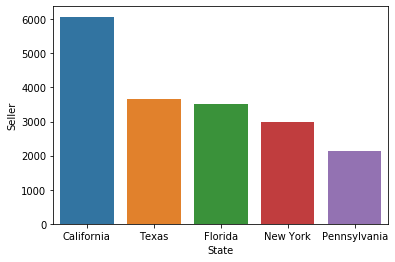

In [65]:
sns.barplot(x=df_sl['State'][:5], y=df_sl['Seller'])

California has the maximum number of sellers on ebay followed by texas and florida.

### Which state has maximum buyer?

In [67]:
#number of  buyer per state
df_by = df.groupby(['state_name_y'])['state_name_y'].count()
df_by = pd.DataFrame({'State': df_by.index, 'Buyer':df_by.values })
#sorting based on the max number of sellers per state
df_by = df_by.sort_values('Buyer', ascending = False)
df_by[:10]

,State,Buyer
3,California,8573
8,Florida,4018
31,New York,3556
43,Texas,2652
12,Illinois,2340
47,Washington,2191
37,Pennsylvania,2034
29,New Jersey,2028
34,Ohio,1599
21,Michigan,1511


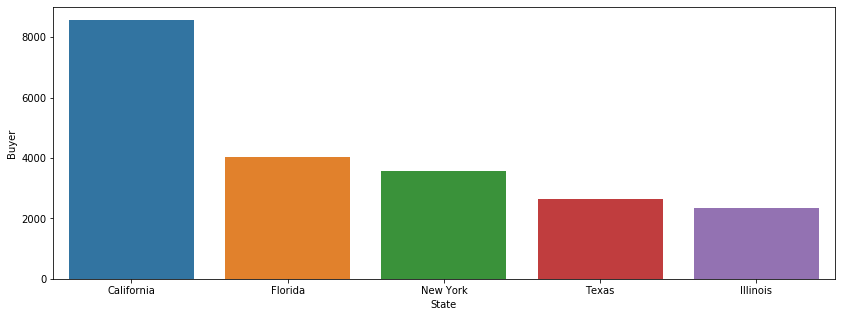

In [73]:
#visualizing the records
sns.barplot(x=df_by['State'][:5], y=df_by['Buyer'])


The maximum number of buyers are from California, Florida, New York.

### Which seller has the minimum average delivery time?

In [77]:
df_sl_d = df.groupby(['seller_id'])['delivery_days'].mean()
df_sl_d = pd.DataFrame({'seller_id': df_sl_d.index, 'delivery_days':df_sl_d.values })
#sorting based on the delivery days
df_sl_d = df_sl_d.sort_values('delivery_days')
df_sl_d[df_sl_d["delivery_days"]>=0][:5]

,seller_id,delivery_days
15021,173895,0.0
22001,581457,0.0
24360,1010210,0.0
25821,1600621,0.0
27255,3435769,0.0


The top sellers that have minimum delivery times can be seen in the table above

### What are the average delivery time for B2C and C2C sellers?

In [78]:
df_sm = df.groupby(['b2c_c2c'])['delivery_days'].mean()
df_sm = pd.DataFrame({'b2c_c2c': df_sm.index, 'delivery_days':df_sm.values })
#sorting based on the delivery days
df_sm = df_sm.sort_values('delivery_days')
df_sm

,b2c_c2c,delivery_days
0,B2C,4.699910
1,C2C,4.951389


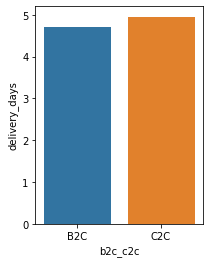

In [92]:
#visualizing
sns.barplot(x = df_sm['b2c_c2c'], y = df_sm['delivery_days'])
plt.rcParams["figure.figsize"] = (3, 4)

Generally the delivery time for C2C is a bit higher than B2C

### Does package size affect the delivery days?

In [93]:
df_ps = df.groupby(['package_size'])['delivery_days'].mean()
df_ps = pd.DataFrame({'package_size': df_ps.index, 'delivery_days':df_ps.values })
#sorting based on the delivery days
df_ps = df_ps.sort_values('delivery_days')
df_ps

,package_size,delivery_days
4,PACKAGE_THICK_ENVELOPE,4.667084
0,LARGE_ENVELOPE,4.713521
1,LARGE_PACKAGE,4.813285
2,LETTER,4.826196
3,NONE,5.848926


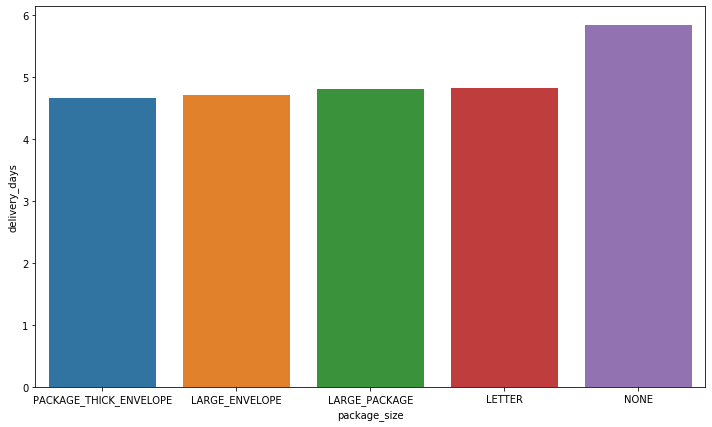

In [96]:
#visualizing
sns.barplot(x = df_ps['package_size'], y = df_ps['delivery_days'])
plt.rcParams["figure.figsize"] = (12, 7)

Suprsingly the delivery days are not much affected by the package size on ebay.

### Which logistics provider has minimum average delivery days? 

In [97]:
df_lp = df.groupby(['shipment_method_id'])['delivery_days'].mean()
df_lp = pd.DataFrame({'shipment_method_id': df_lp.index, 'delivery_days':df_lp.values })
#sorting based on the delivery days
df_lp = df_lp.sort_values('delivery_days')
df_lp[:5]

,shipment_method_id,delivery_days
13,15,3.000000
12,13,3.500000
5,5,3.989583
8,8,4.097087
6,6,4.249117


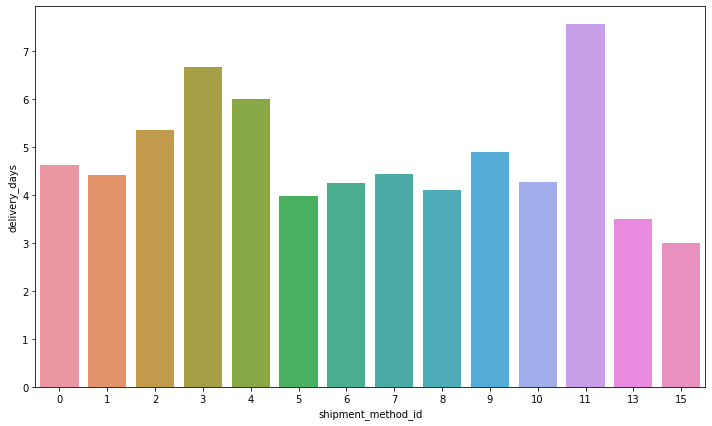

In [98]:
#visualizing
sns.barplot(x = df_lp['shipment_method_id'], y = df_lp['delivery_days'])

Shipment_method 13 is the best while 11 is the worst

### Does quantity affect the delivery days ?

In [100]:
df_q = df.groupby(['quantity'])['delivery_days'].mean()
df_q = pd.DataFrame({'quantity': df_q.index, 'delivery_days':df_q.values })
#sorting based on the delivery days
df_q = df_q.sort_values('delivery_days')
df_q[:10]

,quantity,delivery_days
20,40,2.000000
19,24,3.000000
18,21,3.000000
11,13,3.000000
14,17,3.000000
15,18,3.000000
8,9,3.166667
13,15,3.833333
4,5,4.105263
3,4,4.201970


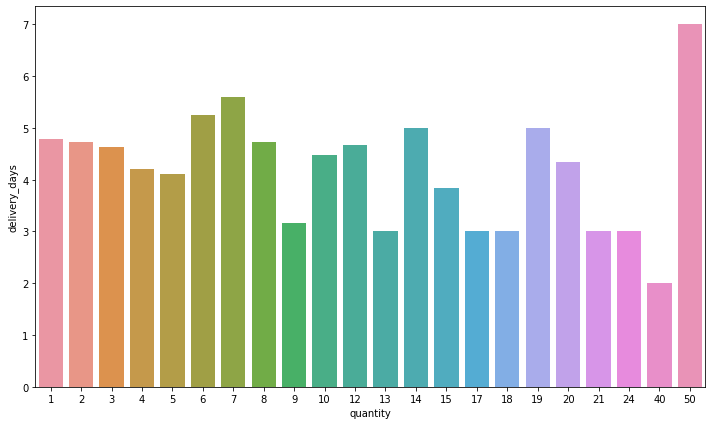

In [101]:
#visualizing
sns.barplot(x  = df_q['quantity'], y = df_q['delivery_days'])

There seems to be no consistency between quantity shipped vs delivery days.

# Feature engineering 

In [60]:
#again dropping unnecessary columns
df = df[['b2c_c2c', 'declared_handling_days', 'shipment_method_id', 'shipping_fee',
       'carrier_min_estimate', 'carrier_max_estimate',
       'category_id', 'item_price', 'quantity',
       'weight', 'weight_units', 'package_size',
       'distance', 'delivery_days', 'del_to_pay']]

In [61]:
#encoding the data

In [62]:
df['b2c_c2c'].value_counts()

B2C    33089
C2C    13180
Name: b2c_c2c, dtype: int64

In [63]:
# converting C2C and B2C into 1, 2 respectively
df['b2c_c2c'].replace(to_replace=['C2C','B2C'],value=[1,2],inplace=True)

In [64]:
df['package_size'].value_counts()

PACKAGE_THICK_ENVELOPE    38495
NONE                       3821
LETTER                     2719
LARGE_ENVELOPE              719
LARGE_PACKAGE               515
Name: package_size, dtype: int64

In [65]:
# converting 'PACKAGE_THICK_ENVELOPE','NONE','LETTER','LARGE_ENVELOPE','LARGE_PACKAGE' into 2,3,1,4,5 besed on their tetative weights
df['package_size'].replace(to_replace=['PACKAGE_THICK_ENVELOPE','NONE','LETTER','LARGE_ENVELOPE','LARGE_PACKAGE'],value=[2,3,1,4,5],inplace=True)

In [66]:
#removing records with pacakge size = EXTRA_LARGE_PACKAGE and VERY_LARGE_PACKAGE since they are not present in the test data
df = df[df['package_size'] != 'EXTRA_LARGE_PACKAGE']
df = df[df['package_size'] != 'VERY_LARGE_PACKAGE']

In [67]:
df.columns

Index(['b2c_c2c', 'declared_handling_days', 'shipment_method_id',
       'shipping_fee', 'carrier_min_estimate', 'carrier_max_estimate',
       'category_id', 'item_price', 'quantity', 'weight', 'weight_units',
       'package_size', 'distance', 'delivery_days', 'del_to_pay'],
      dtype='object')

In [68]:
df.head(5)

,b2c_c2c,declared_handling_days,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,category_id,item_price,quantity,weight,weight_units,package_size,distance,delivery_days,del_to_pay
25183,2,3.0,0,0.0,3,5,13,27.95,1,5,1,1,3001.315231,5,2
29970,1,2.0,0,3.0,3,5,0,20.50,1,0,1,2,1283.289669,4,1
26108,2,1.0,0,4.5,3,5,1,19.90,1,9,1,2,1114.013129,4,1
37044,2,1.0,0,0.0,3,5,1,35.50,1,8,1,2,1354.502549,5,1
27071,2,1.0,0,0.0,3,5,1,25.00,1,3,1,2,2457.524973,4,1


In [69]:
# #saving as step 1 to save kernel memory
# df.to_csv('step2.csv')

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

In [71]:
# df = pd.read_csv('step2.csv')

In [72]:
# df.drop('Unnamed: 0', axis = 1 , inplace = True)

delivery_days             1.000000
del_to_pay                0.819916
declared_handling_days    0.281825
carrier_max_estimate      0.165140
category_id               0.092772
distance                  0.074591
shipment_method_id        0.064164
package_size              0.052412
shipping_fee              0.002192
weight                   -0.000773
item_price               -0.011109
quantity                 -0.011250
b2c_c2c                  -0.034423
carrier_min_estimate     -0.062392
weight_units                   NaN
Name: delivery_days, dtype: float64


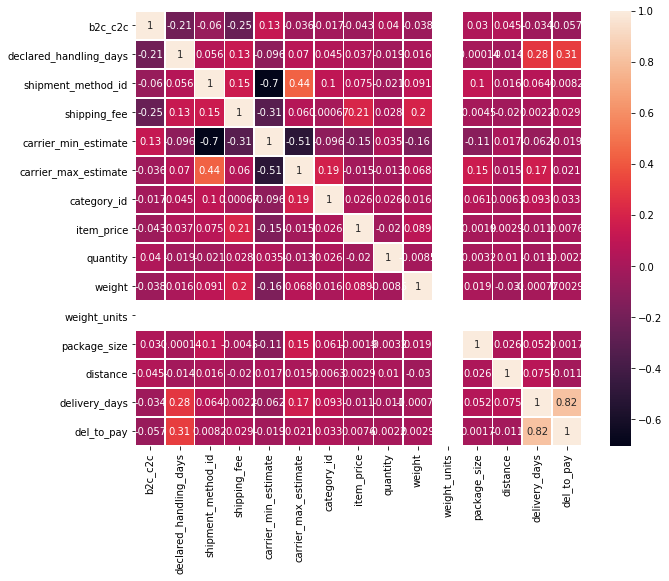

In [73]:
#checking correlation
corr_matrix = df.corr()
print(corr_matrix['delivery_days'].sort_values(ascending=False))

fig, ax = plt.subplots(figsize=(10,8))
hm = sns.heatmap(corr_matrix, annot = True, linewidths=.5, ax = ax)

In [74]:
#del_to_pay has good correlation with the target (delivery days)

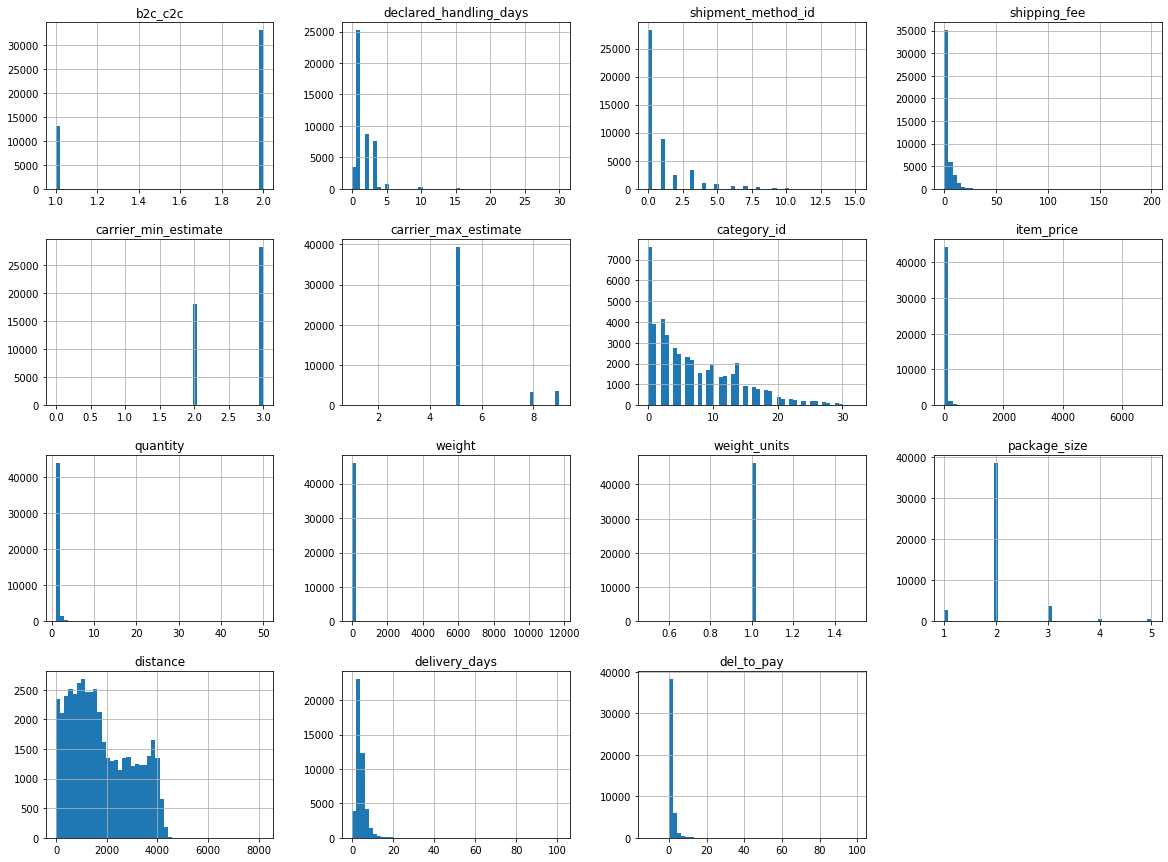

In [75]:
#checking the distribution of all the columns
%matplotlib inline

df.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [76]:
#separating features and target
x = df.drop("delivery_days", axis = 1 )
y = df['delivery_days']

In [77]:
x.columns

Index(['b2c_c2c', 'declared_handling_days', 'shipment_method_id',
       'shipping_fee', 'carrier_min_estimate', 'carrier_max_estimate',
       'category_id', 'item_price', 'quantity', 'weight', 'weight_units',
       'package_size', 'distance', 'del_to_pay'],
      dtype='object')

In [78]:
def loss_function(Yhat, Y):
    Yhat = Yhat.astype(int)
    Y = np.array(Y)
    early_loss, late_loss = 0, 0

    for i in range(len(Yhat)):
        #print(i)
    # early
        if Yhat[i] < Y[i]:
            early_loss += Y[i] - Yhat[i]

    # late
        elif Yhat[i] > Y[i]:
            late_loss += Yhat[i] - Y[i]
    loss = (1/len(Yhat)) * (0.4 * (early_loss) + 0.6 * (late_loss))

    return loss

Usin simple regression with 80 20 split

In [79]:
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state = 0, shuffle = False )

In [85]:
#simple regression
regressor = LinearRegression()

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
score = r2_score(y_test,y_pred)
print("Test RMSE: ", rmse)
print("Test score: ", score)
print("Loss Function: ",loss_function(y_pred,y_test))

y_pred_train = regressor.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
print("Train RMSE: ", rmse_train)
score_train = r2_score(y_train,y_pred_train)
print("Train score: ", score_train)
print("Loss Function: ",loss_function(y_pred_train,y_train))


Test RMSE:  1.9799464036824794
Test score:  0.47986112859107866
Loss Function:  0.4577912254160364
Train RMSE:  1.584540333644081
Train score:  0.74623479922011
Loss Function:  0.4532865054707551


In [36]:
# #saving regression model
# from joblib import dump, load
# dump(regressor, 'reg_simp.joblib')

['reg_simp.joblib']

using simple regression with no split

In [86]:
regressor = LinearRegression()

regressor.fit(x, y)

y_pred = regressor.predict(x)

rmse = np.sqrt(mean_squared_error(y, y_pred))
score = r2_score(y,y_pred)
print("Train RMSE: ", rmse)
print("Train score: ", score)
print("Loss Function: ",loss_function(y_pred,y))

Train RMSE:  1.666434084238392
Train score:  0.7053088294519927
Loss Function:  0.45653461280771146


In [38]:
#saving regression model
from joblib import dump, load
dump(regressor, 'reg_simp_all.joblib')

['reg_simp_all.joblib']

using L2 normalization

In [87]:
#ridge
from sklearn.linear_model import Ridge
regressor = Ridge(alpha=100)

regressor.fit(x, y)

y_pred = regressor.predict(x)

rmse = np.sqrt(mean_squared_error(y, y_pred))
score = r2_score(y,y_pred)
print("Train RMSE: ", rmse)
print("Train score: ", score)
print("Loss Function: ",loss_function(y_pred,y))

Train RMSE:  1.6664356267276332
Train score:  0.7053082839060575
Loss Function:  0.45655190300201


In [27]:
# #saving ridge model
# from joblib import dump, load
# dump(regressor, 'ridge_all.joblib')

['ridge_all.joblib']

In [90]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

model = Sequential()

model.add(Dense(X_train.shape[1], activation='elu'))
model.add(Dense(32, activation='elu'))


model.add(Dense(23, activation='elu'))


model.add(Dense(28, activation='elu'))

model.add(Dense(1))

model.compile(optimizer=Adam(0.001), loss='mse')

r = model.fit(X_train, y_train,
              validation_data=(X_test,y_test),
              batch_size=15,
              epochs=10)

Train on 37015 samples, validate on 9254 samples
Epoch 1/10
37015/37015 [==============================] - 8s 207us/sample - loss: 3.3118 - val_loss: 4.5622
Epoch 2/10
37015/37015 [==============================] - 8s 208us/sample - loss: 2.5330 - val_loss: 4.0912
Epoch 3/10
37015/37015 [==============================] - 8s 209us/sample - loss: 2.5400 - val_loss: 3.4131
Epoch 4/10
37015/37015 [==============================] - 7s 190us/sample - loss: 2.5136 - val_loss: 3.7975
Epoch 5/10
37015/37015 [==============================] - 7s 189us/sample - loss: 2.4793 - val_loss: 3.7440
Epoch 6/10
37015/37015 [==============================] - 7s 201us/sample - loss: 2.4475 - val_loss: 3.4250
Epoch 7/10
37015/37015 [==============================] - 7s 191us/sample - loss: 2.4011 - val_loss: 3.9714
Epoch 8/10
37015/37015 [==============================] - 7s 183us/sample - loss: 2.3770 - val_loss: 3.2305
Epoch 9/10
37015/37015 [==============================] - 7s 187us/sample - loss: 2.398

In [92]:
pred_nn = model.predict(X_test)

In [93]:
loss_function(pred_nn,y_test)

array([0.41895397])